In [2]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import mne

In [5]:
def get_diode_activation_times(threshold, brightness, times):
    activations = []
    flag = 1
    for bright, time in zip(brightness, times):
        if flag and bright > threshold:
            activations.append(time)
            flag = 0
        if bright < threshold:
            flag = 1
    return activations

In [6]:
def plot_stats(latency_arr, package, channels): 
    print('Mean', (latency_arr).mean())
    print('Std', (latency_arr).std())
    print('Min', (latency_arr).min())
    print('Max', (latency_arr).max())
    plt.hist(latency_arr * 1000, bins=10, edgecolor='k')

    plt.xlabel('Latency in ms', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'{package} {channels} channels', fontsize=16)

### xdf file, recorded through lsl record

In [4]:
# read xdf file 
data, header = pyxdf.load_xdf('diod_singleEEG.xdf')
# multiple EEG
data_m, header_m = pyxdf.load_xdf('diod_multipleEEG.xdf')

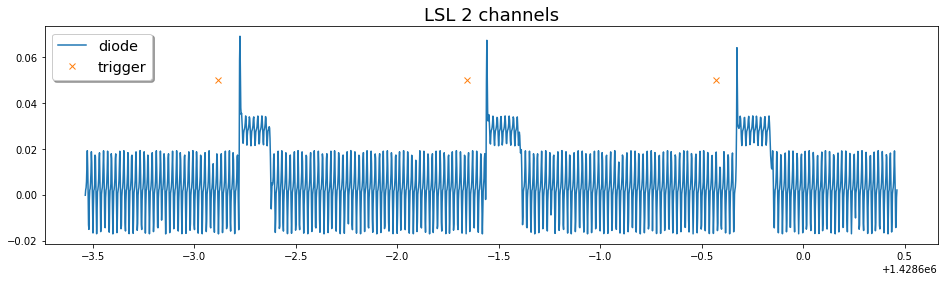

In [16]:
# plot the first 3 samples of single EEG channel
plt.figure(figsize=(16, 4))
plt.plot(data[2]['time_stamps'][3000:5000], data[2]['time_series'][:,0][3000:5000], label='diode')
plt.plot(data[1]['time_stamps'][0:3], data[1]['time_series'][0:3] - 0.95, 'x', label='trigger')
plt.title("LSL 2 channels", fontsize=18)
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

Mean 0.09860060040373356
Std 0.00504769106808277
Min 0.08999949716962874
Max 0.10799934295937419


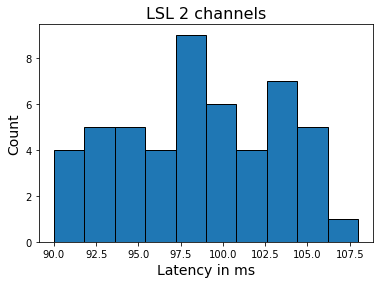

In [56]:
activations_s = get_diode_activation_times(0.04, data[2]['time_series'][:,0], data[2]['time_stamps'])
latency_arr_s = activations_s - data[1]['time_stamps']
plot_stats(latency_arr_s, 'LSL', '2')


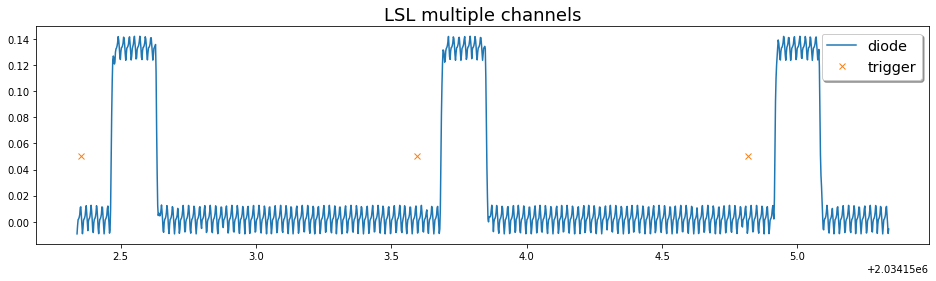

In [9]:
# multiple EEG - plot the first 3 samples 
plt.figure(figsize=(16, 4))
plt.plot(data_m[0]['time_stamps'][6000:7500], data_m[0]['time_series'][:, 64][6000:7500], label='diode')
plt.plot(data_m[1]['time_stamps'][0:3], data_m[1]['time_series'][0:3] - 0.95, 'x', label='trigger')
plt.title("LSL multiple channels", fontsize=18)
plt.legend(loc='best', shadow=True, fontsize='x-large')

Mean 0.09708211617544293
Std 0.005203206653302421
Min 0.08799811289645731
Max 0.11000888422131538


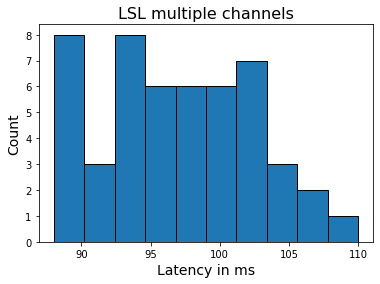

In [57]:
activations_m = get_diode_activation_times(0.04, data_m[0]['time_series'][:,64], data_m[0]['time_stamps'])
latency_arr_m = activations_m - data_m[1]['time_stamps']
plot_stats(latency_arr_m, 'LSL', 'multiple')

### edf file, recorded through EEGO

In [11]:
# read edf file
dataEDF = mne.io.read_raw_edf('diod_singleEEG.edf')
raw_data = dataEDF.get_data()
events = mne.events_from_annotations(dataEDF)
info = dataEDF.info
channels = dataEDF.ch_names

Extracting EDF parameters from c:\Users\shakeda\Documents\Yoav Maya Project\diod_exp\diod_singleEEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: [' 1']


Text(0.5, 1.0, 'ant-neuro EEGO 2 channels')

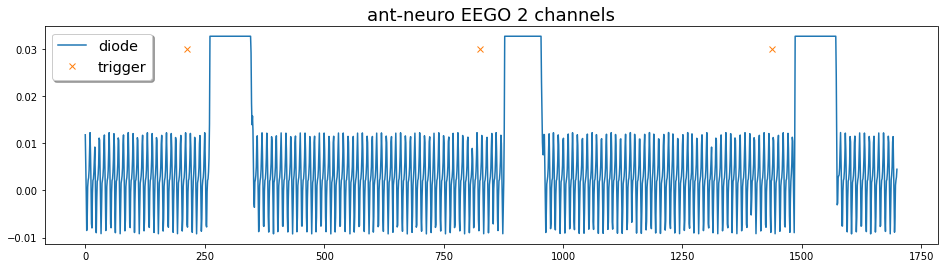

In [17]:
# plot edf data - diod and trigers via EEGO
x = np.array(events[0])[:, 0]
y = len(x)
plt.figure(figsize=(16, 4))
plt.plot(raw_data[0][9800:11500], label='diode')
plt.plot(x[4:7] - 9800 ,[0.03] * 3, 'x', label='trigger')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title("ant-neuro EEGO 2 channels", fontsize=18)

Mean 0.09483999999999998
Std 0.005185981102935105
Min 0.084
Max 0.106


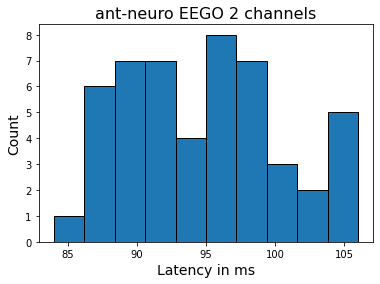

In [58]:
activ_s = get_diode_activation_times(0.02, raw_data[0], list(range(len(raw_data[0]))))
latency_s = activ_s - events[0][:, 0]
plot_stats(latency_s / 500, 'ant-neuro EEGO', '2')

In [14]:
# read edf file - multiple EEG
dataEDF_m = mne.io.read_raw_edf('diod_multipleEEG.edf')
raw_data_m = dataEDF_m.get_data()
events_m = mne.events_from_annotations(dataEDF_m)
info_m = dataEDF_m.info
channels_m = dataEDF_m.ch_names

Extracting EDF parameters from c:\Users\shakeda\Documents\Yoav Maya Project\diod_exp\diod_multipleEEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: [' 1']


Text(0.5, 1.0, 'ant-neuro EEGO multiple channels')

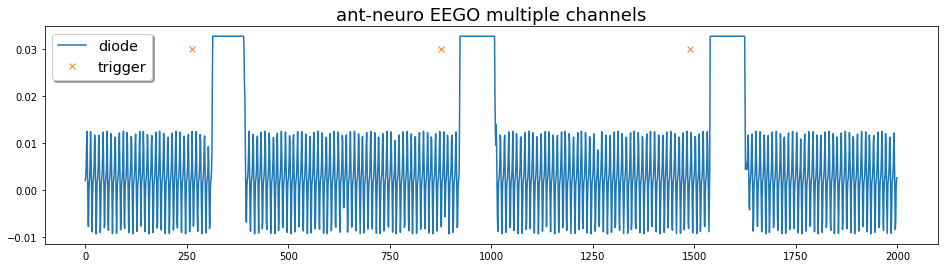

In [15]:
# plot edf data with multiple EEG - diod and trigers via EEGO
x = np.array(events_m[0])[:, 0]
y = len(x)
plt.figure(figsize=(16,4))
plt.plot(raw_data_m[64][10000:12000], label='diode')
plt.plot(x[3:6] - 10000, [0.03] * 3, 'x', label='trigger')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title("ant-neuro EEGO multiple channels", fontsize=18)

Mean 0.09596
Std 0.005207533005176252
Min 0.086
Max 0.11


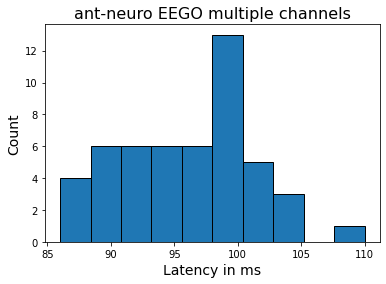

In [59]:
activ_m = get_diode_activation_times(0.02, raw_data_m[64], list(range(len(raw_data_m[0]))))
latency_m = activ_m - events_m[0][:, 0]
plot_stats(latency_m / 500, 'ant-neuro EEGO', 'multiple')